In [3]:
import pandas as pd
import numpy as np

In [4]:
titanic=pd.read_excel("titanic3.xlsx")

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [6]:
titanic2=titanic[["survived","pclass","age","fare"]].dropna()

In [7]:
y=titanic2["survived"]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
y.value_counts()

0    618
1    427
Name: survived, dtype: int64

In [10]:
X=titanic2[["pclass","age","fare"]]

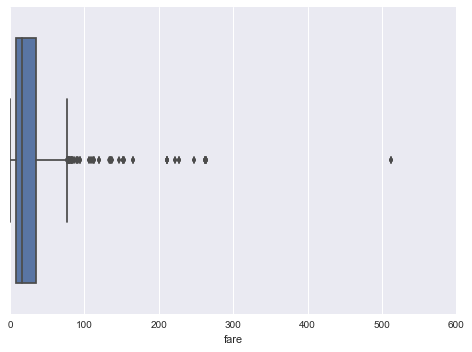

In [11]:
import seaborn as sns
sns.boxplot(X["fare"])

In [12]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

In [13]:
#build train and test sets for X and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [14]:
#define hyperparameters
hyperparam=[{'kernel':['rbf'], 'gamma':[.001,.0001], 'C':[1,10]},
            {'kernel':['linear'], 'C':[1,10]}]

In [15]:
gridModel=GridSearchCV(KNeighborsClassifier(),hyperparam,scoring='accuracy',cv=5)

In [67]:
#fit model
gridModel.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}, {'kernel': ['linear'], 'C': [1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [68]:
#obtain best combination of hyper-parameters
print gridModel.best_params_

{'kernel': 'linear', 'C': 1}


In [73]:
#obtain accuracy for each combination of hyperparamters
gridModel.grid_scores_

[mean: 0.64979, std: 0.02526, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.001},
 mean: 0.65253, std: 0.02301, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001},
 mean: 0.66347, std: 0.03155, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001},
 mean: 0.65390, std: 0.02744, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001},
 mean: 0.67305, std: 0.02956, params: {'kernel': 'linear', 'C': 1},
 mean: 0.67168, std: 0.02838, params: {'kernel': 'linear', 'C': 10}]

In [85]:
#create SVM model
modelSVM=SVC(C=1,kernel="linear",probability=True)

In [86]:
#fit SVM model
modelSVM.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
#predict proba and value with SVM model
y_predict=modelSVM.predict(X_test)
proba_predict=modelSVM.predict_proba(X_test)

In [83]:
#compute accuracy
1-np.abs(y_test-y_predict).sum()/float(len(y_test))

0.7229299363057324